In [14]:
%%capture

import sys

%pip install pandas
%pip install lxml
%pip install matplotlib
%pip install tqdm
%pip install spacy
%pip install wordcloud
%pip install spacy_langdetect
%pip install spacymoji

!{sys.executable} -m spacy download fr_core_news_md
!{sys.executable} -m spacy download en_core_web_md
#python -m spacy download en_core_web_md

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
from tqdm import tqdm
from wordcloud import WordCloud
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import csv
import numpy as np
from spacymoji import Emoji
from liblinear.liblinearutil import *
import re


In [2]:
nlp = spacy.load('fr_core_news_md')
#nlp = spacy.load("en_core_web_md")
#nlp.add_pipe("emoji", first=True)
#def get_lang_detector(nlp, name):
#    return LanguageDetector()
#Language.factory("language_detector", func=get_lang_detector)
#nlp.add_pipe('language_detector', last=True)


In [3]:
DATAFILE = "data/train.xml"

df : pd.DataFrame = pd.read_xml(DATAFILE)
df

,movie,review_id,name,user_id,note,commentaire
0,229864,review_58145147,AM11,Z20051105131449940367618,"4,0","""Ce n'est pas ce qui se trouve en face de vous..."
1,229864,review_59303833,this is my movies,Z20051220181957240298347,"3,5","(...) En soi, je n'ai rien contre ce genre de ..."
2,229864,review_61916672,Shephard69,Z20121226180301760912584,"4,5","Pour sa troisième réalisation après ""Tron, l'h..."
3,229864,review_1000190786,Tayop,Z20121022182542230468657,"3,0",Joseph Kosinski offre de nouvelles images ébou...
4,229864,review_59207755,ned123,Z20061211223247607682175,"3,5",J'ai vu un film... qui traite d'un drame humai...
...,...,...,...,...,...,...
665957,245551,review_55820729,Wally L,Z20121109004006553333277,"4,0",super realisation et quelques bon acteurs. ce...
665958,245551,review_1001840194,r@ch,Z20100726110927837577369,"3,0",Film visuellement très beau et mis en musique ...
665959,245551,review_56242470,Kaiser D.,Z20170721223303710182536,"3,5",parti d'une histoire qui parait pour nous bana...
665960,245551,review_58174196,Florent A.,Z20161204004443590736237,"3,0","Je suis mitigé sur ce film.d un coté,j ai plut..."


In [4]:
df.nunique()


movie            3202
review_id      665962
name            97033
user_id        119666
note               10
commentaire    665001
dtype: int64

In [4]:
df["note"].to_numpy()
notes = df['note'].unique()
notes.sort()

In [ ]:
bag_of_words = pd.DataFrame(columns=notes)
for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment and note :
        nlp_comment = nlp(comment)
        for token in nlp_comment :
            if not token.is_stop :
                if not token.lemma_ in bag_of_words.index :
                    bag_of_words.loc[token.lemma_] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                bag_of_words.loc[token.lemma_][note] += 1
bag_of_words.to_csv('out.csv')
bag_of_words

In [5]:
# fetch bag of words from CSV
bag_of_words : pd.DataFrame = pd.read_csv("out.csv")
bag_of_words

,word,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
0,"""",27256,25001,24640,47188,48732,81768,83523,94065,43979,35470
1,trouve,1125,1218,1309,2859,3437,6303,6576,7226,3200,3058
2,face,616,776,838,1646,1837,3394,4167,5022,2638,2097
3,",",170841,167466,164684,326623,339051,561118,595140,729555,378933,342115
4,tenir,1340,1109,1129,2198,2584,4767,5494,6420,2951,2384
...,...,...,...,...,...,...,...,...,...,...,...
289430,richmond,0,0,0,0,0,0,0,1,0,0
289431,sneaker,0,0,0,0,0,0,0,1,0,0
289432,fierement,0,0,0,0,0,1,0,0,0,0
289433,consommation.violence,0,0,0,0,0,1,0,0,0,0


In [51]:
#wordCloud data creation don't run again
word_cloud = pd.DataFrame(columns=notes)
word_cloud_tmp = ""
tmp_note = "5,0"
for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment and note==tmp_note :
        nlp_comment = nlp(comment)
        for token in nlp_comment :
            if not token.is_stop :
                word_cloud_tmp += token.text + ' '
word_cloud.loc["text"].loc[tmp_note] = word_cloud_tmp
word_cloud
word_cloud.to_xml('wordCloudData.csv')

100%|██████████| 665962/665962 [19:08<00:00, 579.85it/s]  


In [21]:
#fetching wordcloud from csv
word_cloud : pd.DataFrame = pd.read_csv("data/wordCloudData.csv")
word_cloud = word_cloud.drop("Unnamed: 0", axis = 1)
word_cloud.rename(index = {0: "text"}, inplace = True)
word_cloud

,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
text,"vient Allemagne drôles best-seller . Grâce "" C...","bidon passe rien , ! discute rien , déception ...",déçu . agit documentaires juxtaposés ( 40 minu...,film creux base histoire vraie ( mort 19 pompi...,pire morts . mort poisson papillote . RIP homm...,Joseph Kosinski offre nouvelles images ébourif...,"( ... ) , rien contre genre récit hyper codifi...",""" trouve face , tient côté "" . phrase tagline ...","réalisation "" Tron , héritage "" "" Oblivion "" a...",super film tiré réel . Acteurs impeccables rôl...


In [11]:
# word proportion creation don't run again
word_proportion = pd.DataFrame(columns=notes)
totals = bag_of_words.sum(axis='columns')
for row in tqdm(bag_of_words.itertuples()) :
    tot = totals[row[0]]
    if tot > 100 :
        word_proportion.loc[row[1]] = [row[2]/tot, row[3]/tot, row[4]/tot, row[5]/tot, row[6]/tot, row[7]/tot, row[8]/tot, row[9]/tot, row[10]/tot, row[11]/tot]
word_proportion.to_csv('data/wordProportionData100.csv')

C:\Users\Baptiste Quay\AppData\Local\Temp\ipykernel_1852\3132612960.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  totals = bag_of_words.sum(axis='columns')
289435it [00:16, 17833.38it/s] 


In [36]:
display(word_proportion.sort_values(by="5,0"))
word_proportion

,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
Mou,0.264151,0.207547,0.169811,0.169811,0.103774,0.037736,0.009434,0.000000,0.037736,0.000000
infection,0.045455,0.072727,0.054545,0.109091,0.118182,0.227273,0.154545,0.163636,0.054545,0.000000
https://m.facebook.com/la7emecritique/,0.000000,0.000000,0.022388,0.037313,0.179104,0.328358,0.268657,0.141791,0.022388,0.000000
thisismymovies.over-blog.com,0.000000,0.005814,0.017442,0.058140,0.058140,0.162791,0.296512,0.267442,0.133721,0.000000
mètrage,0.044643,0.022321,0.080357,0.120536,0.160714,0.214286,0.187500,0.165179,0.004464,0.000000
...,...,...,...,...,...,...,...,...,...,...
️,0.032099,0.007407,0.000000,0.009877,0.002469,0.027160,0.044444,0.074074,0.049383,0.753086
👏,0.004505,0.000000,0.000000,0.000000,0.000000,0.000000,0.013514,0.126126,0.090090,0.765766
😍,0.000000,0.000000,0.000000,0.008955,0.011940,0.008955,0.002985,0.098507,0.092537,0.776119
❤,0.000000,0.002358,0.000000,0.004717,0.002358,0.014151,0.023585,0.075472,0.066038,0.811321


,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
musicalité,0.000000,0.045872,0.045872,0.036697,0.073394,0.100917,0.155963,0.238532,0.137615,0.165138
Wade,0.000000,0.012987,0.038961,0.071429,0.025974,0.142857,0.220779,0.227273,0.116883,0.142857
virtuos,0.000000,0.009434,0.009434,0.028302,0.018868,0.103774,0.150943,0.235849,0.226415,0.216981
multiplicité,0.000000,0.015267,0.000000,0.091603,0.122137,0.129771,0.236641,0.221374,0.114504,0.068702
imbrique,0.000000,0.007812,0.023438,0.054688,0.062500,0.101562,0.203125,0.296875,0.101562,0.148438
...,...,...,...,...,...,...,...,...,...,...
"0,5",0.576923,0.101648,0.065934,0.013736,0.019231,0.019231,0.057692,0.035714,0.082418,0.027473
Navet,0.604545,0.227273,0.045455,0.040909,0.022727,0.000000,0.018182,0.018182,0.000000,0.022727
daub,0.610849,0.209906,0.070755,0.033019,0.002358,0.023585,0.016509,0.018868,0.007075,0.007075
fuyez,0.664557,0.246835,0.044304,0.018987,0.006329,0.006329,0.000000,0.006329,0.000000,0.006329


In [18]:
# counting totals
tot = 0
cpt = 0
totals = bag_of_words.sum(axis='columns')
display(word_proportion.sum(axis='columns'))
for value in totals.value_counts(normalize=True) :
    tot+=value
    cpt+=1
    if cpt == 100 :
        display(tot)
        break


C:\Users\Baptiste Quay\AppData\Local\Temp\ipykernel_1852\464779937.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  totals = bag_of_words.sum(axis='columns')


"          1.0
trouve     1.0
face       1.0
,          1.0
tenir      1.0
          ... 
Einar      1.0
Footit     1.0
Riggan     1.0
Viguier    1.0
Malony     1.0
Length: 16744, dtype: float64

0.9422184601033033

In [67]:
totals.value_counts(normalize=True).to_csv('wordProportionData.csv')

In [7]:
# fetching word proportion from csv
word_proportion : pd.DataFrame = pd.read_csv("data/wordProportionData.csv")
word_proportion

,word,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
0,"""",0.053274,0.048866,0.048161,0.092232,0.095250,0.159821,0.163251,0.183856,0.085960,0.069329
1,trouve,0.030982,0.033544,0.036050,0.078736,0.094655,0.173584,0.181102,0.199003,0.088128,0.084217
2,face,0.026747,0.033694,0.036386,0.071469,0.079762,0.147367,0.180930,0.218054,0.114541,0.091051
3,",",0.045250,0.044356,0.043619,0.086511,0.089802,0.148620,0.157631,0.193233,0.100366,0.090614
4,tenir,0.044114,0.036509,0.037168,0.072360,0.085067,0.156933,0.180866,0.211351,0.097149,0.078483
...,...,...,...,...,...,...,...,...,...,...,...
289428,richmond,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
289429,sneaker,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
289430,fierement,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
289431,consommation.violence,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


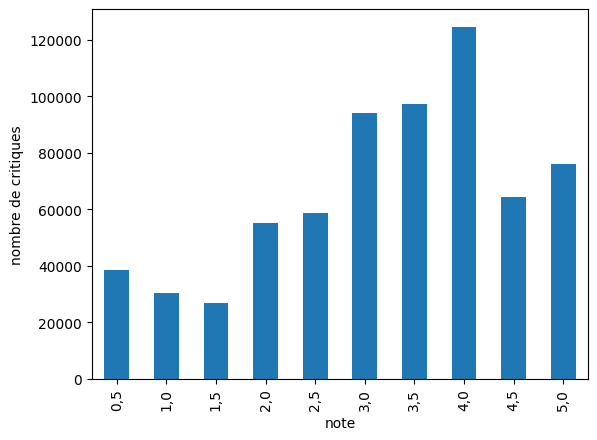

In [25]:
# 1 Nombres de critiques par notes
s = df['note'].value_counts()
s = s.sort_index()
fig = plt.figure()
s.plot.bar()

plt.xlabel("note")
plt.ylabel("nombre de critiques")
plt.show()

In [42]:
df.sort_values(by="user_id", inplace=True)
df

,movie,review_id,name,user_id,note,commentaire
611583,223484,review_43345747,wallaby,Z20010209190420907241533,"4,0","Un joli film d'auteur. Dès le début, on pense ..."
407647,251179,review_57574403,wallaby,Z20010209190420907241533,"5,0","Frais, beau, bien interprété et cette calanque..."
39088,215094,review_1001588959,wallaby,Z20010209190420907241533,"1,0",Décevant. Bien que Daisy Ridley fasse de son m...
142642,234644,review_47614526,wallaby,Z20010209190420907241533,"3,5",Film très intéressant qui m'a permis de connaî...
302308,224808,review_1002859153,wallaby,Z20010209190420907241533,"3,0",Trop long ! Les 40 premières minutes ne sont p...
...,...,...,...,...,...,...
610654,236089,review_1007272091,Thierry Oliver,Z20200518204014587888889,"0,5",C'est à mon avis une daube monumentale. Sans a...
574817,264784,review_1007273863,Powerlithium,Z20200518215109555299217,"4,5","Incroyable, Cyril nous prouve qu'il est possib..."
404150,238378,review_1007274376,Victor LM,Z20200518221244892307441,"0,5",Le film est dépourvu de scène drôle mais est r...
663656,241132,review_1007285816,Agathe Nogues,Z20200519030838474204775,"5,0",Un film incroyable! Ce film est à la fois touc...


In [43]:
# 2 moyenne des notes par utilisateurs
tmp_user = 'Z20010209190420907241533'
total = 0
note_nbr = 0
means = []
df.sort_values(by="user_id", inplace=True)
for user, note in tqdm(df[['user_id', 'note']].to_numpy()) :
    if tmp_user != user :
        tmp_user = user
        # round((total/note_nbr) * 2) / 2 si on veut des valeurs sur 0.5, 1, 1.5 etc
        means.append(round((total/note_nbr) * 2)/2)
        total, note_nbr = 0, 0

    total += float(note.replace(",","."))
    note_nbr += 1


100%|██████████| 665962/665962 [00:02<00:00, 322775.60it/s]


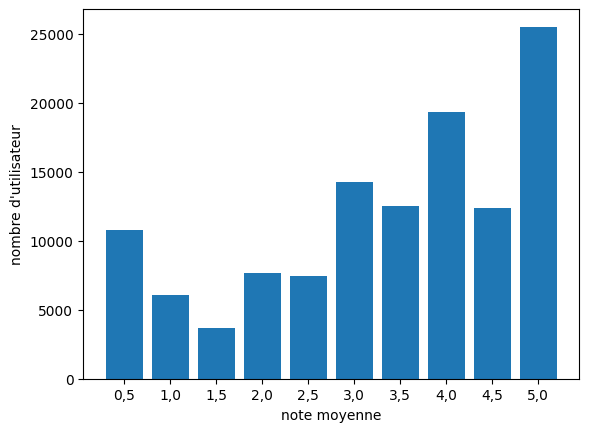

In [44]:
means.sort()
dict_means = dict(zip(notes, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
for i in means :
    if i == 0.5 :
        dict_means["0,5"] += 1
    elif i == 1 :
        dict_means["1,0"] += 1
    elif i == 1.5 :
        dict_means["1,5"] += 1
    elif i == 2 :
        dict_means["2,0"] += 1
    elif i == 2.5 :
        dict_means["2,5"] += 1
    elif i == 3 :
        dict_means["3,0"] += 1
    elif i == 3.5 :
        dict_means["3,5"] += 1
    elif i == 4 :
        dict_means["4,0"] += 1
    elif i == 4.5 :
        dict_means["4,5"] += 1
    elif i == 5 :
        dict_means["5,0"] += 1
plt.bar(dict_means.keys(), dict_means.values())
plt.xlabel("note moyenne")
plt.ylabel("nombre d'utilisateur")
plt.show()

In [45]:
# 2 nombre de critiques par user :

occur = df.groupby(['user_id']).size()
sorted_occur = occur.sort_values()
sorted_occur

user_id
Z20200519042856506959012       1
Z20120916195228527425638       1
Z20120916194606280192665       1
Z20180317131024293698531       1
Z20180317131737157866948       1
                            ... 
Z20051202210829790363634    1292
Z20121030010419857506421    1319
Z20030916115310953701324    1392
Z20110911192312063343373    1447
Z20051105131449940367618    1740
Length: 119666, dtype: int64

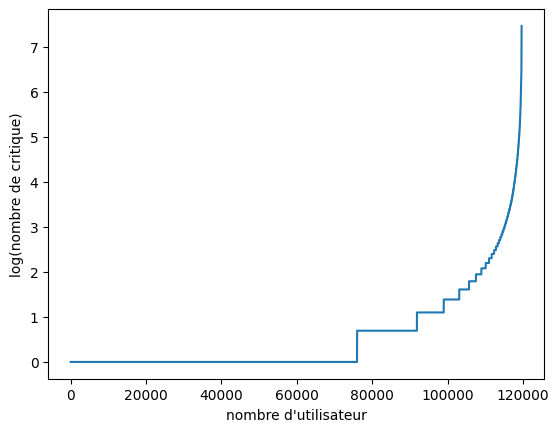

In [48]:
plt.plot(np.log(sorted_occur.values))
plt.xlabel("nombre d'utilisateur")
plt.ylabel("log(nombre de critique)")
plt.show()

In [57]:
# 2 Analyse des utilisateurs (moyenne des notes par utilisateurs)
tmp_user = ''
total = 0
note_nbr = 0
means = []
df.sort_values(by="user_id", inplace=True)
for user, note in tqdm(df[['user_id', 'note']].to_numpy()) :
    if tmp_user != user and total != 0:
        tmp_user = user
        # round((total/note_nbr) * 2) / 2 si on veut des valeurs sur 0.5, 1, 1.5 etc
        if total > 4 : 
            means.append(round((total/note_nbr) * 2)/2)
        total, note_nbr = 0, 0

    total += float(note.replace(",","."))
    note_nbr += 1

100%|██████████| 665962/665962 [00:02<00:00, 326475.39it/s]


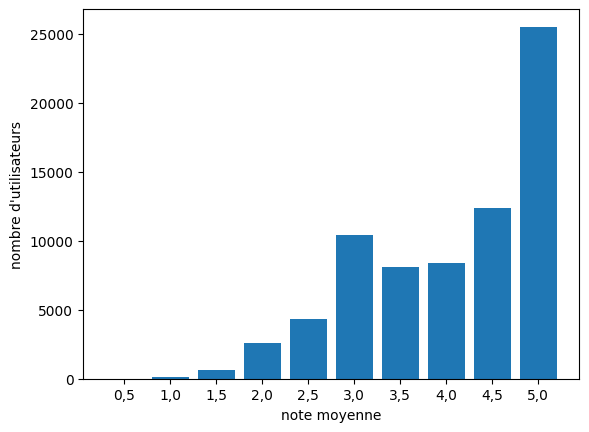

In [58]:
means.sort()
dict_means = dict(zip(notes, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
for i in means :
    if i == 0.5 :
        dict_means["0,5"] += 1
    elif i == 1 :
        dict_means["1,0"] += 1
    elif i == 1.5 :
        dict_means["1,5"] += 1
    elif i == 2 :
        dict_means["2,0"] += 1
    elif i == 2.5 :
        dict_means["2,5"] += 1
    elif i == 3 :
        dict_means["3,0"] += 1
    elif i == 3.5 :
        dict_means["3,5"] += 1
    elif i == 4 :
        dict_means["4,0"] += 1
    elif i == 4.5 :
        dict_means["4,5"] += 1
    elif i == 5 :
        dict_means["5,0"] += 1
plt.bar(dict_means.keys(), dict_means.values())
plt.xlabel("note moyenne")
plt.ylabel("nombre d'utilisateurs")
plt.show()

In [59]:
# 2 nombre de critiques par film :

occur = df.groupby(['movie']).size()
sorted_occur = occur.sort_values()
sorted_occur

movie
228607       1
269944       1
257280       1
248487       1
270017       1
          ... 
215094    1480
222512    1503
212120    1538
217882    1864
237821    1871
Length: 3202, dtype: int64

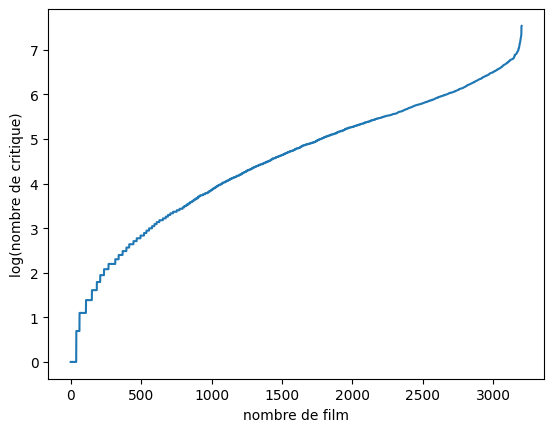

In [64]:
plt.plot(np.log(sorted_occur.values))
plt.xlabel("nombre de film")
plt.ylabel("log(nombre de critique)")
plt.show()

In [51]:
# 3 Analyse des films (moyenne des notes par films)

tmp_movie = ''
total = 0
note_nbr = 0
means = []
df.sort_values(by="movie", inplace=True)
for movie, note in tqdm(df[['movie', 'note']].to_numpy()) :
    if tmp_movie != movie and total != 0:
        tmp_movie = movie
        # round((total/note_nbr) * 2) / 2 si on veut des valeurs sur 0.5, 1, 1.5 etc
        means.append(round((total/note_nbr) * 2)/2)
        total, note_nbr = 0, 0

    total += float(note.replace(",","."))
    note_nbr += 1


100%|██████████| 665962/665962 [00:01<00:00, 346912.19it/s]


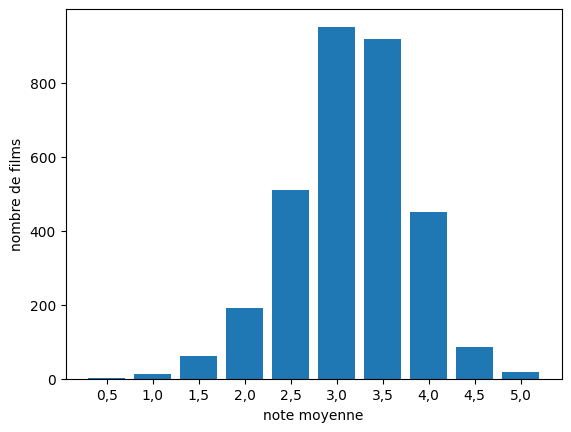

In [52]:
means.sort()
dict_means = dict(zip(notes, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
for i in means :
    if i == 0.5 :
        dict_means["0,5"] += 1
    elif i == 1 :
        dict_means["1,0"] += 1
    elif i == 1.5 :
        dict_means["1,5"] += 1
    elif i == 2 :
        dict_means["2,0"] += 1
    elif i == 2.5 :
        dict_means["2,5"] += 1
    elif i == 3 :
        dict_means["3,0"] += 1
    elif i == 3.5 :
        dict_means["3,5"] += 1
    elif i == 4 :
        dict_means["4,0"] += 1
    elif i == 4.5 :
        dict_means["4,5"] += 1
    elif i == 5 :
        dict_means["5,0"] += 1
plt.bar(dict_means.keys(), dict_means.values())
plt.xlabel("note moyenne")
plt.ylabel("nombre de films")
plt.show()

In [21]:
# 4.1 distribution des mots les plus fréquents par note

# WordCloud creation
note = "0,5"
text = word_cloud.loc["text"].loc[note]

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'word_cloud' is not defined

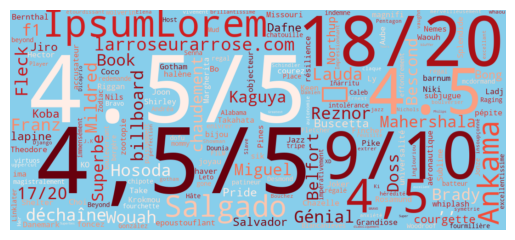

In [37]:
# wordcloud from frequency 
note = "4,5"
d = {}
cpt = 0
for index, row in word_proportion.iterrows():
    d[index] = row[note]
    
wordcloud = WordCloud(background_color='skyblue',width=1080, height=480, colormap="Reds")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Word frequency sorted from higher to lower
note = "5,0"
text = word_cloud.loc["text"].loc[note]
word_frequency = WordCloud().process_text(text)
frequency_list = sorted(word_frequency.items(), key=lambda item:item[1])
frequency_list.reverse()
for k, v in frequency_list :
    print(k,v)


'Nullissime'

0.7430167597765364

'fuyez'

0.6645569620253164

'daub'

0.6108490566037735

'Navet'

0.6045454545454545

'0,5'

0.5769230769230769

'nullité'

0.5663531870428422

'bouze'

0.5298507462686567

'0.5'

0.5271317829457365

'bous'

0.5267175572519084

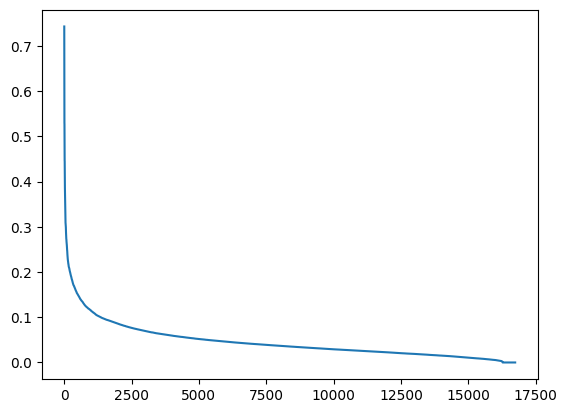

In [34]:
# Word proportion frequency
note = "0,5"
word_proportion.sort_values(by=note, inplace=True, ascending=False)
for index, row in word_proportion.iterrows() :
    if  row[note] > 0.5 :
        display(index, row[note])
plt.plot(word_proportion[note].values)
plt.show()

In [6]:
df.sort_values("note", inplace=True)
df

,movie,review_id,name,user_id,note,commentaire
332980,138880,review_27974143,SHWARZIE,Z20061223123237770658689,"0,5",Une comédie américaine simplette remplie de bo...
56473,213893,review_42587965,Tom G.,Z20131228010156160823245,"0,5",j'ai pluerer pendent et apres le film. penden...
479474,223754,review_55108781,yvesA77,Z20131204165759710756173,"0,5",Nanar intergalactique ! que de lenteurs ! ce n...
56487,213893,review_42184452,Alice S.,Z20140324161842360924388,"0,5","On tombe dans tous les clichés de ""on n'est a ..."
148914,132150,review_52261330,atomewarrior,Z20110303190024017478821,"0,5",Des acteurs totalement inutiles avec ses effet...
...,...,...,...,...,...,...
447406,250865,review_1000364000,Fab,Z20190811173756577208973,"5,0",Parfait remake du dessin animé. Will Smith est...
514914,193339,review_34975968,Rachel F.,Z20120930192804017273478,"5,0",Un film magic ;) A voir absolument entre copin...
447409,250865,review_1001352623,Seb D.,Z20140602213416693308387,"5,0",il a respecté le dessin animé de bout en bout ...
170029,132040,review_1000682005,Mango .,Z20020118163918793937245,"5,0","Une tuerie orgasmique, papy rambo en a encore ..."


In [22]:
average_length_per_note = pd.DataFrame(columns=notes,  index=[0])

,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 4.2 Distribution de la longueur des commentaires par note

last_note = "0,5"
total = 0
cpt = 0
average_length_per_note = pd.DataFrame(columns=notes,  index=[0])
for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment :
        if last_note != note :
            average_length_per_note[last_note] = total/cpt
            total, cpt = 0, 0
            last_note = note
        total += len(nlp(comment))
    elif last_note != note :
        total, cpt = 0,0
        last_note = note
    cpt += 1
average_length_per_note["5,0"] = total/cpt

In [65]:
plt.plot(average_length_per_note.iloc[0])
plt.xlabel("note")
plt.ylabel("nombre de mots moyen par commentaire")
plt.show()

NameError: name 'average_length_per_note' is not defined

In [18]:
# 4.4 Influence des emojis et smileys
df.sort_values(by="note", ascending=False, inplace = True)
for note, commentaire in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if commentaire :
        txt = nlp(commentaire)
        if txt._.has_emoji:
            display(txt)
            break
        

100%|██████████| 665962/665962 [34:26<00:00, 322.19it/s]


In [32]:
punct_repetition = pd.DataFrame(columns=notes)
punct_repetition

,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"


In [7]:
# 4.5 Influence de la ponctuation
cpt = 0
punct = ""
tot_punct = ""
punct_repetition = pd.DataFrame(columns=notes)
total = 0

for index, row in tqdm(df.iterrows()) :
    if row["commentaire"] :
        for token in nlp(row["commentaire"]):
            if token.is_punct and token.text == punct :
                cpt +=1
                tot_punct += punct
            elif len(tot_punct) > 2 :
                if tot_punct in df :
                    punct_repetition.at[row["note"],tot_punct] +=1
                else :
                    punct_repetition.loc[tot_punct] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                    punct_repetition[row["note"]][tot_punct] +=1
                cpt = 0
                punct = ""
                tot_punct = ""
            elif token.is_punct :
                punct = token.text
                tot_punct = ""
                cpt = punct_frequency

665962it [2:39:58, 69.38it/s] 


In [11]:
# 4.5 Influence de la ponctuation
punct_frequency = pd.DataFrame(columns=notes)
punct_frequency.loc["punct"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punct_frequency.loc["total"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment :
        total = 0
        cpt = 0
        for token in nlp(comment):
            if token.is_punct :
                cpt += 1
            total += 1
        punct_frequency[note]["punct"] += cpt
        punct_frequency[note]["total"] += total
display(punct_frequency)

100%|██████████| 665962/665962 [3:29:36<00:00, 52.95it/s]      


,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
punct,499818,460613,440788,861506,882248,1443161,1523759,1857990,960774,908860
total,3680372,3513077,3462864,6853637,7229786,11925428,12707546,15158534,7675756,7170499


In [15]:
punct_frequency.loc["percentage"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tmp = []
for note in notes :
    tmp.append(punct_frequency.loc["punct"].loc[note]/punct_frequency.loc["total"].loc[note])
    display(tmp)
punct_frequency

[0.13580638044197707]

[0.13580638044197707, 0.13111383553505943]

[0.13580638044197707, 0.13111383553505943, 0.127290011966973]

[0.13580638044197707,
 0.13111383553505943,
 0.127290011966973,
 0.12570055869606167]

[0.13580638044197707,
 0.13111383553505943,
 0.127290011966973,
 0.12570055869606167,
 0.12202961470782123]

[0.13580638044197707,
 0.13111383553505943,
 0.127290011966973,
 0.12570055869606167,
 0.12202961470782123,
 0.12101544699276202]

[0.13580638044197707,
 0.13111383553505943,
 0.127290011966973,
 0.12570055869606167,
 0.12202961470782123,
 0.12101544699276202,
 0.11990977644306776]

[0.13580638044197707,
 0.13111383553505943,
 0.127290011966973,
 0.12570055869606167,
 0.12202961470782123,
 0.12101544699276202,
 0.11990977644306776,
 0.12257055992353878]

[0.13580638044197707,
 0.13111383553505943,
 0.127290011966973,
 0.12570055869606167,
 0.12202961470782123,
 0.12101544699276202,
 0.11990977644306776,
 0.12257055992353878,
 0.1251699506862907]

[0.13580638044197707,
 0.13111383553505943,
 0.127290011966973,
 0.12570055869606167,
 0.12202961470782123,
 0.12101544699276202,
 0.11990977644306776,
 0.12257055992353878,
 0.1251699506862907,
 0.12674989564882444]

,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
punct,499818,460613,440788,861506,882248,1443161,1523759,1857990,960774,908860
total,3680372,3513077,3462864,6853637,7229786,11925428,12707546,15158534,7675756,7170499
percentage,0,0,0,0,0,0,0,0,0,0


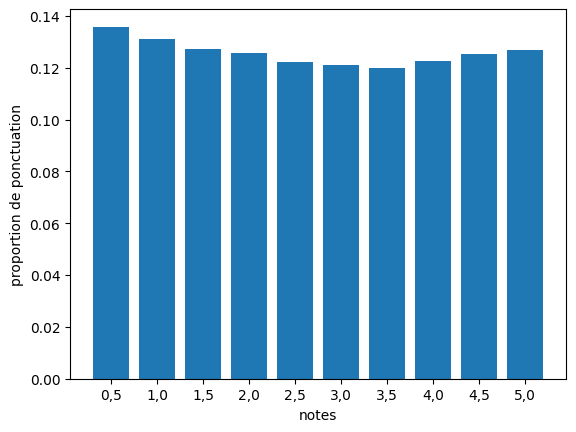

In [16]:
# fix spaces on plot
xaxis = np.array(notes)
yaxis = np.array(tmp)
plt.bar(xaxis,yaxis)
plt.xlabel("notes")
plt.ylabel("proportion de ponctuation")
plt.show()

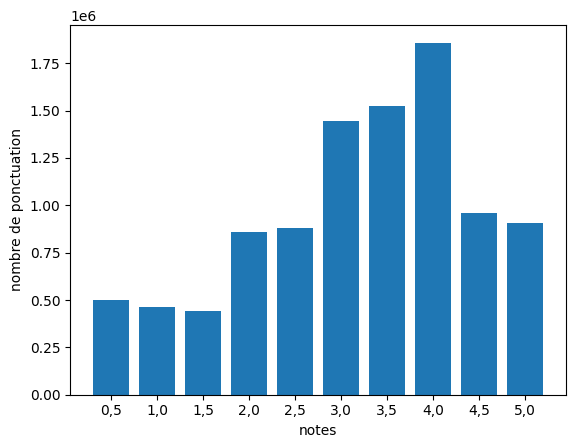

In [17]:
# fix spaces on plot
xaxis = np.array(notes)
yaxis = np.array(punct_frequency.loc["punct"])
plt.bar(xaxis,yaxis)
plt.xlabel("notes")
plt.ylabel("nombre de ponctuation")
plt.show()

In [19]:
punct_repetition : pd.DataFrame = pd.read_csv("data/punctuation.csv")
punct_repetition

,mot,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
0,",,,",0,0,0,0,0,1,0,0,0,0
1,"""""""",0,0,0,1,0,0,0,0,0,0
2,...,0,0,0,0,0,0,1,0,0,0
3,!!!!!!!!!!,0,0,0,0,0,0,1,0,0,0
4,!!!,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
247,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,0,0,0,0,0,0,0,0,0,1
248,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,0,0,0,0,0,0,0,0,0,1
249,______________________________________________...,0,0,0,0,0,1,0,0,0,0
250,:-):-):-),1,0,0,0,0,0,0,0,0,0


In [ ]:
punct_repetition_cleared = pd.DataFrame(columns=notes)
for index, row in punct_repetition.iterrows() :
    if len(row["mot"]) > 2 :
        chars = nlp(row["mot"])
        for note in notes :
            if chars[0].text in punct_repetition_cleared :
                display("nice")
                punct_repetition_cleared.at[row["note"],chars[0].text] +=1
            else :
                display(chars[0].text)
                punct_repetition_cleared.loc[chars[0].text] = [row["0,5"], row["1,0"], row["1,5"], row["2,0"], row["2,5"], row["3,0"], row["3,5"], row["4,0"], row["4,5"], row["5,0"]]
                break

In [29]:
punct_repetition_cleared.to_csv("data/clearedPunctuation.csv")

In [8]:
# 4.6 URL detection
# CSV creation don't launch again

url_data = pd.DataFrame(columns=notes)
url_data.loc[0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for index, row in tqdm(df.iterrows()) :
    if row["commentaire"] :
        for token in nlp(row["commentaire"]):
            if token.like_url :
                url_data[row["note"]] += 1
url_data


665962it [2:57:53, 62.39it/s] 


,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
0,468,534,475,1003,1292,2049,2195,2514,1089,972


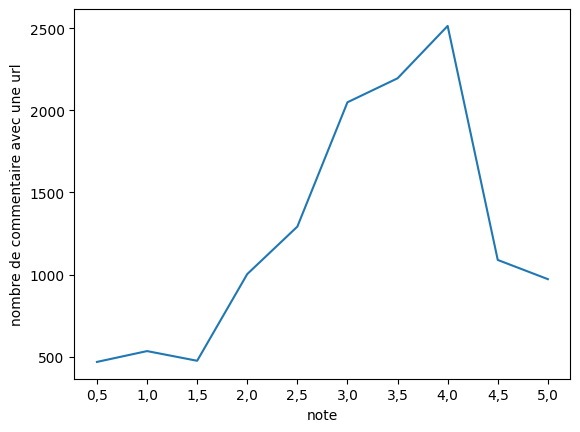

In [10]:
plt.plot(url_data.iloc[0])
plt.xlabel("note")
plt.ylabel("nombre de commentaire avec une url")
plt.show()

In [54]:
# 4.7 Language detection
# CSV creation don't launch again

f = open('data/langdetect.csv', 'w')
writer = csv.writer(f, delimiter =';')

for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment :
        text = nlp(comment)
        writer.writerow([note ,text._.language.get('language'), round(text._.language.get('score'),2)])
    else :
        writer.writerow([note , "none", 0])

f.close()

100%|██████████| 665962/665962 [3:57:19<00:00, 46.77it/s]   


In [ ]:
#fetching language detection from csv

language_detection : pd.DataFrame = pd.read_csv("data/langdetect.csv", ';')
language_detection["language"].to_numpy()
languages = language_detection['language'].unique()
language_detection

In [10]:
# dataframe creation
languages_count_notes = pd.DataFrame(index=languages,columns=notes)
languages_count_notes["total"] = 0
for col in languages_count_notes.columns:
    languages_count_notes[col].values[:] = 0

In [ ]:
# setting the data
for index, row in language_detection.iterrows():
    languages_count_notes.at[row["language"], row["note"]] += 1
for index, row in languages_count_notes.iterrows() :
    total = 0
    for val in row :
        total += val
    languages_count_notes.at[index, "total"] = total
languages_count_notes

In [ ]:
languages_count_notes.sort_values(by=['total'], inplace=True,ascending=False)
languages_count_notes

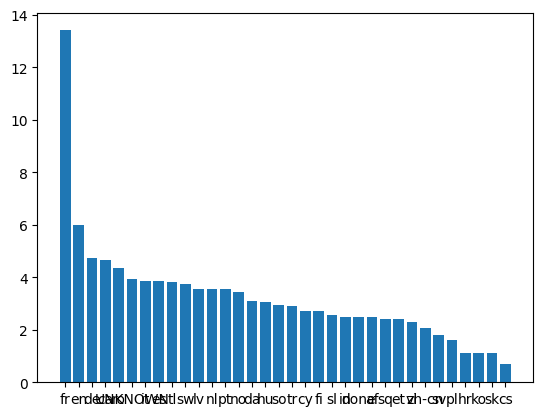

In [73]:
# fix spaces on plot
xaxis = np.array(languages_count_notes.index)
yaxis = np.array(np.log(languages_count_notes["total"]))
plt.bar(xaxis,yaxis)
plt.xlabel("langages")
plt.ylabel("log(nombre de commentaires)")
plt.show()

In [3]:
TRAIN_DATAFILE = "data/train.xml"
DEV_DATAFILE = "data/dev.xml"
train_dataframe : pd.DataFrame = pd.read_xml(TRAIN_DATAFILE)
dev_dataframe : pd.DataFrame = pd.read_xml(DEV_DATAFILE)

dev_dataframe.replace('\n',' ', regex=True, inplace=True)
dev_dataframe.replace('\r',' ', regex=True, inplace=True)
dev_dataframe.replace('\t',' ', regex=True, inplace=True)
train_dataframe.replace('\n',' ', regex=True, inplace=True)
train_dataframe.replace('\r',' ', regex=True, inplace=True)
train_dataframe.replace('\t',' ', regex=True, inplace=True)

# save the dataframe to a csv file
train_dataframe[["review_id", "note", "commentaire"]].to_csv("data/train.tsv", index=False, sep="\t")
dev_dataframe[["review_id", "note", "commentaire"]].to_csv("data/dev.tsv", index=False, sep="\t")

In [3]:
class Token :
    id = 0
    text = ""
    occurrences = 0

    def __init__(self, s, i, o):
        self.text = s
        self.id = i
        self.occurrences = o

In [ ]:
class Review :
    review_id
    note
    tokens

    def __init__(self, i, n):
        self.note = n
        self.tokens = []
        self.review_id = i

In [12]:
nlp (str(2/5))

0.4

In [3]:
TRAIN_DATAFILE = "data/train.tsv"
DEV_DATAFILE = "data/dev.tsv"

train_dataframe : pd.DataFrame = pd.read_csv(TRAIN_DATAFILE, sep="\t")
dev_dataframe : pd.DataFrame = pd.read_csv(DEV_DATAFILE, sep="\t")
full_dataframe = pd.concat([train_dataframe, dev_dataframe], axis=0)

In [13]:
tokens = []
cpt = 1
reviews = pd.DataFrame(columns=["id","note", "tokens", "occurrences"])
reviews.set_index('id', inplace=True)
# 4.4 Influence des emojis et smileys
for review_id, note, commentaire in tqdm(full_dataframe.to_numpy()) :
    id = review_id[7:len(review_id)]
    reviews.loc[id]=(note, [], [])
    if commentaire :
        for mot in nlp(str(commentaire)) :
            found = False
            for token in tokens :
                if mot.text == token.text :
                    currentToken = token
                    found = True
                    break
            if not found :
                currentToken = Token(mot.text, cpt, 0)
                tokens.append(currentToken)
                cpt += 1
            found = False
            for token in reviews.loc[id]["tokens"] :
                if token == currentToken.id :
                    reviews.loc[id]["occurrences"][reviews.loc[id]["tokens"].index(token)] += 1
                    found = True
                    break
            if not found :
                reviews.loc[id]["tokens"].append(currentToken.id)
                reviews.loc[id]["occurrences"].append(1)

 81%|████████  | 622250/766362 [113:01:43<33:21:29,  1.20it/s]       

In [ ]:
f = open("data/svmTrainData.txt", "a")

for note, tokens, occurrences in tqdm(reviews.to_numpy()) :
    f.write(note)
    for i in range(0, len(tokens)-1) :
        f.write(" " + str(tokens[i]) + ":" + str(occurrences[i]))
    f.write("\n")
f.close()

In [6]:
bag_of_words = []
for review_id, note, commentaire in tqdm(full_dataframe.to_numpy()) :
    d = {"note_svm":note, "review_id":review_id}
    if commentaire :
        for mot in nlp(str(commentaire)) :
            if (mot.text in d.keys()) :
                d[mot.text] += 1
            else :
                d[mot.text] = 1
    bag_of_words.append(d)

100%|██████████| 766362/766362 [2:46:51<00:00, 76.55it/s]   


In [9]:
f = open("data/bagOfWords.txt", "w", encoding='utf-8')

for i in bag_of_words:
    f.write((str(i["review_id"]) + " " + str(i["note_svm"])))
    for j in i :
        if (j != "review_id" and j != "note_svm"):
            f.write((" " + str(j) + ":" + str(i[j])))
    f.write("\n")
f.close()

In [3]:
bag_of_words = []
f = open("data/bagOfWords.txt", "r",  encoding='utf-8')
for lign in f:
    d = {}
    l = re.split(' |\n|\r', lign)
    for j in l :
        i = j.split(':')
        if len(i) == 1 :
            tmp = i[0]
            if "_" in tmp :
                d["review_id"] = tmp
            elif "," in tmp :
                d["note_svm"] = tmp
        else :
            d[i[0]]=i[1]
    bag_of_words.append(d)
f.close()

In [4]:
index = {}
cpt = 1
for i in bag_of_words:
    for j in i :
        if not(j in index.keys()) and (j != "review_id") and (j != "note_svm") :
            index[j] = cpt
            cpt += 1

In [55]:
f = open("data/index.tsv", "w", encoding='utf-8')

for i in index:
    f.write(str(index[i]) + "\t" + str(i) + "\n")
f.close()

In [5]:
indexedBagOfWords = []
for i in bag_of_words:
    d = {}
    for j in i :
        if j == "review_id" :
            d["review_id"] = i[j]
        elif j == "note_svm" :
            d["note_svm"] = i[j]
        elif not(index[j] in d.keys()) :
            d[index[j]] = i[j]
        else :
            d[index[j]] += i[j]
    indexedBagOfWords.append(d)

In [57]:
f = open("data/indexedBagOfWords.txt", "w", encoding='utf-8')

for i in indexedBagOfWords:
    if ("review_id" in i.keys()):
        f.write(str(i["review_id"]) + " " )
    else :
        f.write("review_id" + " ")
    if "note_svm" in i.keys() :
        f.write(str(i["note_svm"]))
    else :
        f.write("2,5")
    for j in i :
        if (j != "review_id" and j != "note_svm"):
            f.write(" " + str(j) + ":" + str(i[j]))
    f.write('\n')
f.close()

In [7]:
indexedBagOfWords = []
f = open("data/indexedBagOfWords.txt", "r",  encoding='utf-8')
for lign in f:
    note_found = False
    if (lign[0] == " ") or len(lign) < 7:
        continue
    d = {}
    l = lign.split(' ')
    for j in l :
        i = j.split(':')
        if len(i) == 1 :
            tmp = i[0]
            if "_" in tmp :
                d["review_id"] = tmp
            elif "," in tmp :
                
                note_found = True
                tmp = tmp.split(',')
                d["note_svm"] = float(tmp[0] + "." + tmp[1])
        else :
            d[i[0]]=i[1]
    if note_found :
        indexedBagOfWords.append(d)
f.close()

In [8]:
f = open("data/train.svm", "w", encoding='utf-8')

for i in indexedBagOfWords:
    if len(i) > 2 :
        if "note_svm" in i.keys() :
            f.write(str(i["note_svm"]))
        else :
            f.write("2.5")
        for j in i :
            if (j != "review_id" and j != "note_svm"):
                f.write(" " + str(j) + ":" + str(i[j]))
f.close()

In [5]:
d = {"note-svm":4.5, 1:2, 2:3}
print(len(d))

3


In [9]:
y, x = svm_read_problem('data/train.svm')
m = train(y[:200], x[:200], '-c 4')
p_label, p_acc, p_val = predict(y[200:], x[200:], m)

ValueError: could not convert string to float: ''

In [26]:
y

[4.0]